In [1]:
pip install torch torchvision clip-by-openai pillow matplotlib

INFO: pip is looking at multiple versions of clip-by-openai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of clip-by-openai to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Using cached torchvision-0.22.0-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached torch-2.7.0-cp312-cp312-win_amd64.whl.metadata (29 kB)
  Using cached torchvision-0.17.2-cp312-cp312-win_amd64.whl.metadata (6.6 kB)

The conflict is caused by:
    The user requested torch
    torchvision 0.17.0 depends on torch==2.2.0
    clip-by-openai 1.1 depends on torch<1.7.2 and >=1.7.1
    The user requested torch
    torchvision 0.17.0 depends on

ERROR: Cannot install clip-by-openai==0.1.0, clip-by-openai==0.1.1, clip-by-openai==0.1.1.2, clip-by-openai==0.1.1.3, clip-by-openai==0.1.1.4, clip-by-openai==0.1.1.5, clip-by-openai==1.0.1, clip-by-openai==1.1, torch and torchvision==0.17.0 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


✅ Self-contained CLIP Zero-Shot Classification Results
------------------------------------------------------------
Image 1: ❌ Matched to: 'A steaming cup of black coffee on a wooden table...'
Image 2: ❌ Matched to: 'A slice of pepperoni pizza on a white plate...'
Image 3: ✅ Matched to: 'Snow-capped mountain under blue sky...'
Image 4: ✅ Matched to: 'A steaming cup of black coffee on a wooden table...'
Image 5: ✅ Matched to: 'A white commercial airplane flying through clouds...'
Image 6: ✅ Matched to: 'Golden sunset over a tropical beach with palm tree...'
Image 7: ❌ Matched to: 'A steaming cup of black coffee on a wooden table...'
Image 8: ❌ Matched to: 'A steaming cup of black coffee on a wooden table...'
Image 9: ❌ Matched to: 'A steaming cup of black coffee on a wooden table...'
Image 10: ❌ Matched to: 'A steaming cup of black coffee on a wooden table...'

🎯 Top-1 Accuracy: 40.0%

📊 Similarity matrix saved as 'similarity_matrix.png'


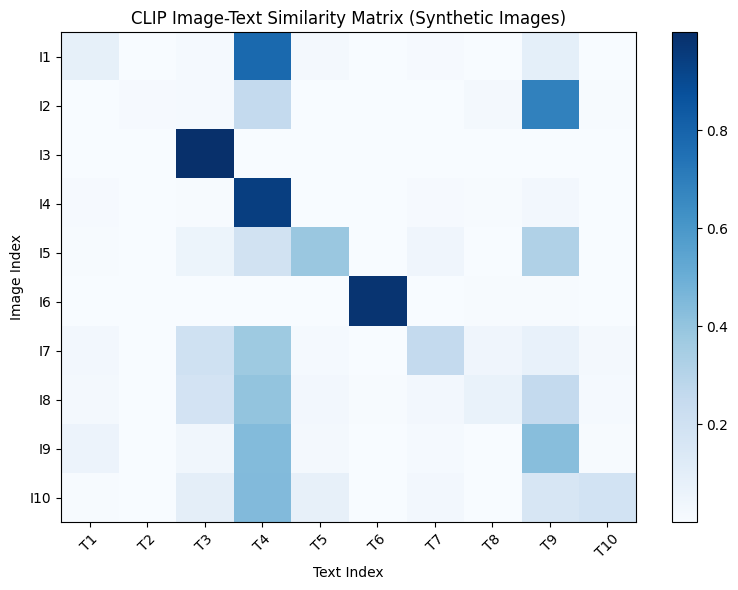

In [11]:
import os
import torch
import clip
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

os.makedirs("images", exist_ok=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

texts = [
    "A fluffy orange cat sitting on a windowsill",
    "A shiny red Ferrari parked on a city street",
    "Snow-capped mountain under blue sky",
    "A steaming cup of black coffee on a wooden table",
    "A white commercial airplane flying through clouds",
    "Golden sunset over a tropical beach with palm trees",
    "An open silver laptop on a clean office desk",
    "A golden retriever chasing a red ball in a park",
    "A slice of pepperoni pizza on a white plate",
    "A blue mountain bike leaning against a brick wall"
]

def create_placeholder_image(text, idx):
    colors = [
        (255, 200, 150), (255, 100, 100), (200, 220, 255), (180, 140, 100),
        (240, 240, 240), (255, 220, 150), (220, 220, 220), (255, 240, 180),
        (255, 200, 200), (180, 200, 255)
    ]
    img = Image.new("RGB", (224, 224), color=colors[idx % len(colors)])
    draw = ImageDraw.Draw(img)
    
    try:
        font = ImageFont.load_default()
    except:
        font = None
    
    short_label = text.split()[0] + " " + text.split()[1]  
    draw.text((10, 100), short_label, fill=(0, 0, 0), font=font)
    draw.text((10, 120), f"Image {idx+1}", fill=(0, 0, 0), font=font)
    
    path = f"images/image_{idx+1}.jpg"
    img.save(path)
    return path

image_paths = [create_placeholder_image(texts[i], i) for i in range(10)]

images = []
for path in image_paths:
    image = Image.open(path).convert("RGB")
    images.append(preprocess(image))
image_input = torch.stack(images).to(device)

text_tokens = clip.tokenize(texts).to(device)

with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_tokens)
    
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

predictions = similarity.argmax(dim=1).cpu().numpy()
correct = sum(pred == i for i, pred in enumerate(predictions))
accuracy = correct / 10

print("✅ Self-contained CLIP Zero-Shot Classification Results")
print("-" * 60)
for i in range(10):
    status = "✅" if predictions[i] == i else "❌"
    print(f"Image {i+1}: {status} Matched to: '{texts[predictions[i]][:50]}...'")

print(f"\n🎯 Top-1 Accuracy: {accuracy * 100:.1f}%")

plt.figure(figsize=(8, 6))
plt.imshow(similarity.cpu().numpy(), cmap='Blues', aspect='auto')
plt.colorbar()
plt.xlabel("Text Index")
plt.ylabel("Image Index")
plt.title("CLIP Image-Text Similarity Matrix (Synthetic Images)")
plt.xticks(range(10), [f"T{i+1}" for i in range(10)], rotation=45)
plt.yticks(range(10), [f"I{i+1}" for i in range(10)])
plt.tight_layout()
plt.savefig("similarity_matrix.png", dpi=150)
print("\n📊 Similarity matrix saved as 'similarity_matrix.png'")

In [5]:
pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to c:\users\arsen\appdata\local\temp\pip-req-build-r422ntdq
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ftfy-6.3.1-py3-none-any.whl.metadata (7.3 kB)
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369633 sha256=d448355b2ebfc56b4c25a2daf04b08fcb849e21c5c42db5a3f889937aec4e9fe
  Stored in directory: C:\Users\arsen\AppData\Local\Temp\pip-ephem-wheel-cache-p7pjjrju\wheels\35\3e\df\3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\arsen\AppData\Local\Temp\pip-req-build-r422ntdq'


In [7]:
pip install torch torchvision ftfy regex

Note: you may need to restart the kernel to use updated packages.
